In [1]:
from IPython.display import display
import os
import sys

import maspy.reader
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sys.path.append("..")
from python_scripts import ticplot

In [2]:
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["font.family"] = "Arial"

## Define parameters, load mzml files

In [3]:
# Define parameters
file_dir = "../ms_data/GFP-Atg8_trypsin_untreated"
filename = "20171123_QexHF2_RSLC2_Hollenstein_Hartl_UW_MFPL_GFP_MA_unmod_Atg8GFP_tryp_digest_10per"
output_dir = "../plots/figure_1"

In [4]:
# Read mzml files
msrun_container = maspy.core.MsrunContainer()
filepath = os.path.join(file_dir, filename + ".mzML")
maspy.reader.importMzml(filepath, msrunContainer=msrun_container)

## Plot figures

In [5]:
figname = "basepeak_plot.pdf"
figpath = os.path.join(output_dir, figname)

colors = {filename: "#000000"} # "#00CAC0",
light_colors = {filename: "#808080"} # "#83e3da",

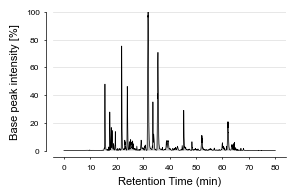

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(3, 1.8))
arrays = msrun_container.getArrays(
    ["tic", "basepeakI", "rt"],
    sort="rt",
    specfiles=filename,
    selector=lambda si: si.msLevel == 1,
)
arrays["rt"] = arrays["rt"] / 60
arrays["basepeak percent"] = arrays["basepeakI"] / max(arrays["basepeakI"]) * 100
style = {"color": colors[filename], "lw": 0.5}

ticplot(arrays["rt"], arrays["basepeak percent"], plotkwargs=style, ax=ax)

ax.fill_between(
    x=arrays["rt"],
    y1=arrays["basepeak percent"],
    y2=[0] * len(arrays["basepeak percent"]),
    color=light_colors[filename],
    alpha=0.5,
    edgecolor="None",
)

max_ylim = [0, 100]
ax.set_ylim(max_ylim)
ax.set_ylabel("Base peak intensity [%]")
fig.savefig(figpath, dpi=300)